# TP 02 RCR2:

## Fuzzy Logic


In [1]:
from fuzzylogic.classes import Domain, Rule
from fuzzylogic.functions import trapezoid
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme('notebook')

# Définition des E/S du controlleur

In [2]:
# initialisation de notre premier controleur d'entrée
PM = Domain('PM', -100, 120)

# initialisation de notre deuxieme controleur d'entrée
NT = Domain('NT', -13, 15)

# initialisation de notre controleur de sortie
PA = Domain('PA', -110, 90)

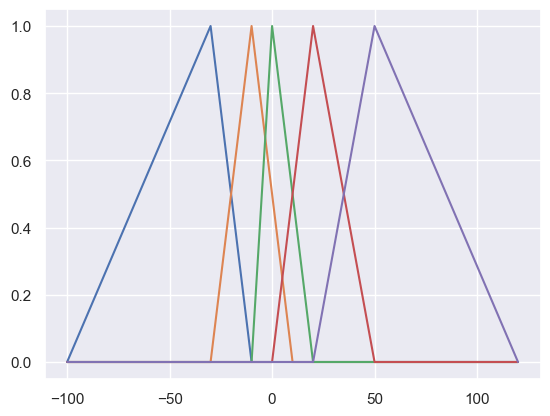

In [3]:
PM.NG = trapezoid(-100, -30, -30, -10)
PM.NP = trapezoid(-30, -10, -10, 10)
PM.EZ = trapezoid(-10, 0, 0, 20)
PM.PP = trapezoid(0, 20, 20, 50)
PM.PG = trapezoid(20, 50, 50, 120)

PM.NG.plot()
PM.NP.plot()
PM.EZ.plot()
PM.PP.plot()
PM.PG.plot()

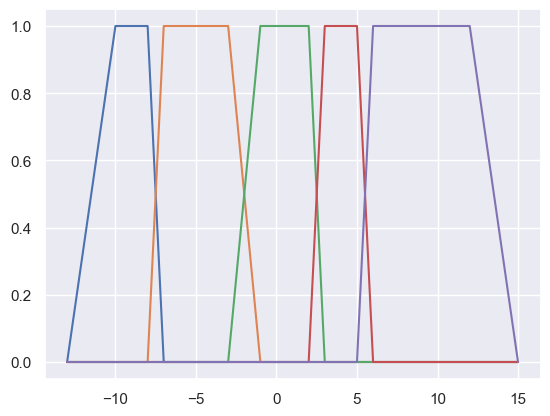

In [4]:
NT.Vmiad = trapezoid(-13, -10, -8, -7)
NT.Vmid = trapezoid(-8, -7, -3, -1)
NT.EZ = trapezoid(-3, -1, 2, 3)
NT.Vmxd = trapezoid(2, 3, 5, 6)
NT.Vmxad = trapezoid(5, 6, 12, 15)

NT.Vmiad.plot()
NT.Vmid.plot()
NT.EZ.plot()
NT.Vmxd.plot()
NT.Vmxad.plot()

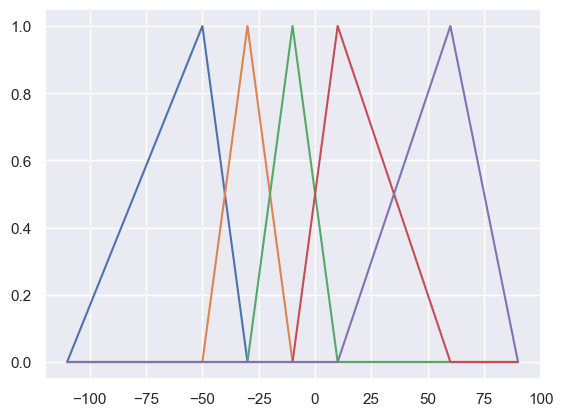

In [5]:
PA.NG = trapezoid(-110, -50, -50, -30)
PA.NP = trapezoid(-50, -30, -30, -10)
PA.EZ = trapezoid(-30, -10, -10, 10)
PA.PP = trapezoid(-10, 10, 10, 60)
PA.PG = trapezoid(10, 60, 60, 90)

PA.NG.plot()
PA.NP.plot()
PA.EZ.plot()
PA.PP.plot()
PA.PG.plot()

###  Construction de la base de regle

In [6]:

# Initialize rules based on the provided rule set
rules = Rule({
    (PM.PG, NT.Vmiad): PA.PG,
    (PM.PG, NT.Vmid): PA.PP,
    (PM.PG, NT.EZ): PA.EZ,
    (PM.PG, NT.Vmxd): PA.NP,
    (PM.PG, NT.Vmxad): PA.NG,
    (PM.PP, NT.Vmiad): PA.PP,
    (PM.PP, NT.Vmid): PA.EZ,
    (PM.PP, NT.EZ): PA.NP,
    (PM.PP, NT.Vmxd): PA.PG,
    (PM.PP, NT.Vmxad): PA.NG,
    (PM.EZ, NT.Vmiad): PA.EZ,
    (PM.EZ, NT.Vmid): PA.EZ,
    (PM.EZ, NT.EZ): PA.EZ,
    (PM.EZ, NT.Vmxd): PA.NP,
    (PM.EZ, NT.Vmxad): PA.NG,
    (PM.NP, NT.Vmiad): PA.NP,
    (PM.NP, NT.Vmid): PA.NP,
    (PM.NP, NT.EZ): PA.NP,
    (PM.NP, NT.Vmxd): PA.NG,
    (PM.NP, NT.Vmxad): PA.NG,
    (PM.NG, NT.Vmiad): PA.NG,
    (PM.NG, NT.Vmid): PA.NG,
    (PM.NG, NT.EZ): PA.NG,
    (PM.NG, NT.Vmxd): PA.NG,
    (PM.NG, NT.Vmxad): PA.NG,
})



### Application de la méthode d'inférence


In [7]:
# On récupère les pourcentages d'appartenances de nos controleurs d'entrée selon leur valeur
PM_output = list(PM(-25).values())
PM_output = [float(x) for x in PM_output]

NT_output = list(NT(-2.5).values())
NT_output = [float(x) for x in NT_output]

print(f'PM_output: {PM_output}')
print(f'NT_output: {NT_output}')

PM_output: [0.75, 0.25, 0.0, 0.0, 0.0]
NT_output: [0.0, 0.75, 0.25, 0.0, 0.0]


In [8]:
# On applique les régles d'inférence de mandanie
Output_NG = max(
    min(PM_output[4], NT_output[4]),
    min(PM_output[3], NT_output[4]),
    min(PM_output[2], NT_output[4]),
    min(PM_output[1], NT_output[3]),
    min(PM_output[1], NT_output[4]),
    min(PM_output[0], NT_output[0]),
    min(PM_output[0], NT_output[1]),
    min(PM_output[0], NT_output[2]),
    min(PM_output[0], NT_output[3]),
    min(PM_output[0], NT_output[4]),
)

Output_NP = max(
    min(PM_output[4], NT_output[3]),
    min(PM_output[3], NT_output[2]),
    min(PM_output[2], NT_output[3]),
    min(PM_output[1], NT_output[0]),
    min(PM_output[1], NT_output[1]),
    min(PM_output[1], NT_output[2]),
)

Output_EZ = max(
    min(PM_output[4], NT_output[2]),
    min(PM_output[3], NT_output[1]),
    min(PM_output[2], NT_output[0]),
    min(PM_output[2], NT_output[1]),
    min(PM_output[2], NT_output[2]),
)

Output_PP = max(
    min(PM_output[4], NT_output[1]),
    min(PM_output[3], NT_output[0]),
)

Output_PG = max(
    min(PM_output[4], NT_output[0]),
    min(PM_output[3], NT_output[3]),
)


all_outputs = [Output_NG, Output_NP, Output_EZ, Output_PP, Output_PG]

print(f'Output_NG: {Output_NG}')
print(f'Output_NP: {Output_NP}')
print(f'Output_EZ: {Output_EZ}')
print(f'Output_PP: {Output_PP}')
print(f'Output_PG: {Output_PG}')


Output_NG: 0.75
Output_NP: 0.25
Output_EZ: 0.0
Output_PP: 0.0
Output_PG: 0.0


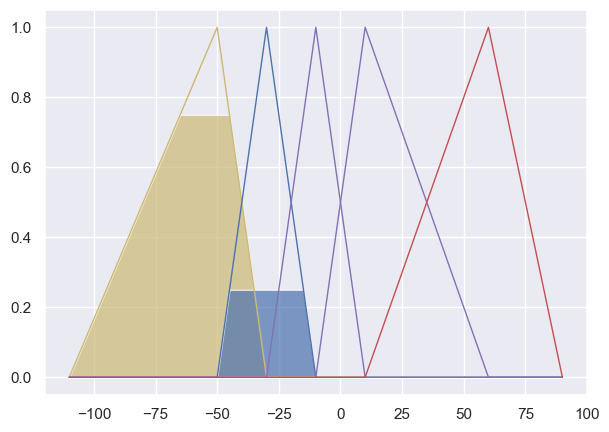

In [9]:
fig, axis = plt.subplots(figsize=(7, 5))

x_PA = PA.range

PA_0 = np.zeros_like(x_PA)
parametres_PA = [PA.NG, PA.NP, PA.EZ, PA.PP, PA.PG]
j=0
colors = ['y', 'b', 'm', 'm', 'r']
for each in parametres_PA:
    sns.lineplot(x=x_PA, y=each.array(), color=colors[j], linewidth=1)
    axis.fill_between(x_PA, PA_0, [min(all_outputs[j], x) for x in each.array()], facecolor=colors[j], alpha=0.7)
    j+=1

In [10]:
values = {
    PM: -25,
    NT: -2.5,
}
centre_de_gravite = rules(values)
print(f"Centre de gravite obtenu avec les valeurs est egale a : {centre_de_gravite}")

Centre de gravite obtenu avec les valeurs est egale a : -52.509673852957434
